### Data Dictionary

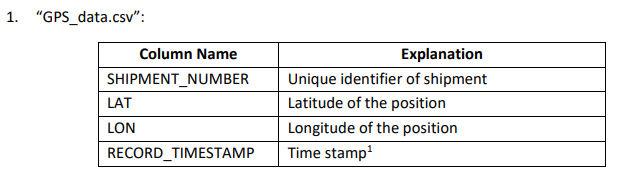
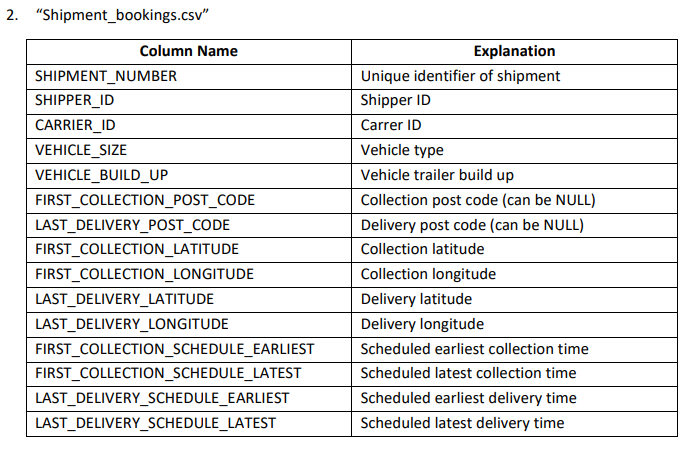


### Completed Tasks

1. Task-1 (Percentage of shipments met the on-time delivery)
2. Task-2 (Notification on potential delay)
3. Task-3 (Predict the likelihood of delay for the list of shipments in “New_bookings.csv”)
4. Task-4 (Summarization Presentation from above tasks along with data anlysis)

Points are taken care:

a. Demonstrated best practices in coding: Both task-1 and task-2 are done within functions with comment on each line

b. Provided an overview  on model deployment

c. API calls for location extraction

### Import Libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

### Load data sets

In [2]:
df_gps = pd.read_csv("GPS_data.csv")
df_nw_book = pd.read_csv("New_bookings.csv")
df_shp_book = pd.read_csv("Shipment_bookings.csv")

### Data Overview

In [3]:
print(df_gps.shape)
print(df_nw_book.shape)
print(df_shp_book.shape)

(641662, 4)
(1000, 15)
(3245, 15)


In [4]:
df_gps.head()

,SHIPMENT_NUMBER,LAT,LON,RECORD_TIMESTAMP
0,SEZHUK-230918-245388,53.291931,-1.072948,2023-10-09T19:25:00.000+0100
1,SEZHUK-230918-245388,53.400404,-1.078563,2023-10-09T19:40:00.000+0100
2,SEZHUK-230918-245388,53.574182,-1.215761,2023-10-09T19:55:00.000+0100
3,SEZHUK-230918-245388,53.706805,-1.336503,2023-10-09T20:10:00.000+0100
4,SEZHUK-230918-245388,53.747501,-1.640298,2023-10-09T20:25:00.000+0100


In [5]:
df_nw_book.head(3)

,SHIPMENT_NUMBER,SHIPPER_ID,CARRIER_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,LAST_DELIVERY_LONGITUDE,FIRST_COLLECTION_SCHEDULE_EARLIEST,FIRST_COLLECTION_SCHEDULE_LATEST,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST
0,SEZHUK-240118-283413,ee7cbc7b-4f14-44ac-9c6e-086d70a27141,CAUK000872,Tractor Unit,Box,DUBLIN,DN3 3FF,53.407411,-6.238118,53.537912,-1.033570,2024-01-18T18:00:00.000Z,2024-01-18T23:00:00.000Z,2024-01-19T12:00:00.000Z,2024-01-19T13:00:00.000Z
1,SEZHUK-240111-281159,192cd5b5-978c-4681-b206-2f4d04e081ec,CAUK000876,Tractor Unit,Curtain-Side 13.6M Trailer,LS24 9SD,BT26 6JJ,53.882244,-1.267537,54.474078,-6.104285,2024-01-12T10:00:00.000Z,2024-01-16T07:00:00.000Z,2024-01-16T07:30:00.000Z,2024-01-16T08:00:00.000Z
2,SEZHUK-240110-280958,ee7cbc7b-4f14-44ac-9c6e-086d70a27141,CAUK000872,Tractor Unit,Curtain-Side 13.6M Trailer,DUBLIN,DN3 3FF,53.407411,-6.238118,53.537912,-1.033570,2024-01-11T15:03:00.000Z,2024-01-11T15:33:00.000Z,2024-01-12T14:33:00.000Z,2024-01-12T15:03:00.000Z


In [6]:
df_shp_book.head(3)

,PROJECT_ID,SHIPMENT_NUMBER,CARRIER_DISPLAY_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,LAST_DELIVERY_LONGITUDE,FIRST_COLLECTION_SCHEDULE_EARLIEST,FIRST_COLLECTION_SCHEDULE_LATEST,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST
0,5456fcfa-5b0c-428e-b322-240d508b6660,SEZHUK-231005-250448,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,PE29 2XR,EH48 2FB,52.315672,-0.157664,55.877803,-3.648558,2023-10-06T09:45:00.000Z,2023-10-06T10:00:00.000Z,2023-10-09T09:55:00.000Z,2023-10-09T10:25:00.000Z
1,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,-1.231993,2023-12-19T14:20:00.000Z,2023-12-19T16:00:00.000Z,2023-12-20T06:00:00.000Z,2023-12-20T08:56:00.000Z
2,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231210-272018,CAUK000435,Tractor Unit,Box 44ft,BD5 8LZ,EN3 7QP,53.767302,-1.746560,51.660700,-0.022247,2023-12-14T01:20:00.000Z,2023-12-14T03:00:00.000Z,2023-12-14T07:03:00.000Z,2023-12-14T10:43:00.000Z


In [7]:
#Check null values
df_shp_book.isna().sum()

PROJECT_ID                            0
SHIPMENT_NUMBER                       0
CARRIER_DISPLAY_ID                    0
VEHICLE_SIZE                          0
VEHICLE_BUILD_UP                      0
FIRST_COLLECTION_POST_CODE            1
LAST_DELIVERY_POST_CODE               4
FIRST_COLLECTION_LATITUDE             0
FIRST_COLLECTION_LONGITUDE            0
LAST_DELIVERY_LATITUDE                0
LAST_DELIVERY_LONGITUDE               0
FIRST_COLLECTION_SCHEDULE_EARLIEST    0
FIRST_COLLECTION_SCHEDULE_LATEST      0
LAST_DELIVERY_SCHEDULE_EARLIEST       0
LAST_DELIVERY_SCHEDULE_LATEST         0
dtype: int64

**Missing values treatment not required because missingness is not there in our required fields for the tasks**

In [8]:
#Check if any duplicate data present
df_shp_book.duplicated().sum()

0

In [9]:
df_shp_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3245 entries, 0 to 3244
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   PROJECT_ID                          3245 non-null   object 
 1   SHIPMENT_NUMBER                     3245 non-null   object 
 2   CARRIER_DISPLAY_ID                  3245 non-null   object 
 3   VEHICLE_SIZE                        3245 non-null   object 
 4   VEHICLE_BUILD_UP                    3245 non-null   object 
 5   FIRST_COLLECTION_POST_CODE          3244 non-null   object 
 6   LAST_DELIVERY_POST_CODE             3241 non-null   object 
 7   FIRST_COLLECTION_LATITUDE           3245 non-null   float64
 8   FIRST_COLLECTION_LONGITUDE          3245 non-null   float64
 9   LAST_DELIVERY_LATITUDE              3245 non-null   float64
 10  LAST_DELIVERY_LONGITUDE             3245 non-null   float64
 11  FIRST_COLLECTION_SCHEDULE_EARLIEST  3245 no

In [10]:
df_gps.isna().sum()

SHIPMENT_NUMBER     0
LAT                 0
LON                 0
RECORD_TIMESTAMP    0
dtype: int64

In [11]:
df_gps.duplicated().sum()

0

In [12]:
df_gps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641662 entries, 0 to 641661
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   SHIPMENT_NUMBER   641662 non-null  object 
 1   LAT               641662 non-null  float64
 2   LON               641662 non-null  float64
 3   RECORD_TIMESTAMP  641662 non-null  object 
dtypes: float64(2), object(2)
memory usage: 19.6+ MB


### Value correction

In [13]:
df_shp_book["VEHICLE_SIZE"].unique()

array(['Tractor Unit', '3.5T Van', '3.5 T Van', '18T Rigid', '26T Rigid',
       '7.5T Rigid'], dtype=object)

In [14]:
df_shp_book["VEHICLE_SIZE"] = df_shp_book["VEHICLE_SIZE"].replace({'3.5 T Van':'3.5T Van'})

### Date Time data type conversion

In [15]:
# Shipment Booking data
df_shp_book['FIRST_COLLECTION_SCHEDULE_EARLIEST'] = pd.to_datetime(df_shp_book['FIRST_COLLECTION_SCHEDULE_EARLIEST'], utc=True)
df_shp_book['FIRST_COLLECTION_SCHEDULE_LATEST'] = pd.to_datetime(df_shp_book['FIRST_COLLECTION_SCHEDULE_LATEST'], utc=True)
df_shp_book['LAST_DELIVERY_SCHEDULE_EARLIEST'] = pd.to_datetime(df_shp_book['LAST_DELIVERY_SCHEDULE_EARLIEST'], utc=True)
df_shp_book['LAST_DELIVERY_SCHEDULE_LATEST'] = pd.to_datetime(df_shp_book['LAST_DELIVERY_SCHEDULE_LATEST'], utc=True)

#GPS booking data
df_gps['RECORD_TIMESTAMP'] = pd.to_datetime(df_gps['RECORD_TIMESTAMP'], utc=True)

### Column name correction

In [16]:
df_shp_book.rename(columns={"PROJECT_ID":"SHIPPER_ID"},inplace=True)

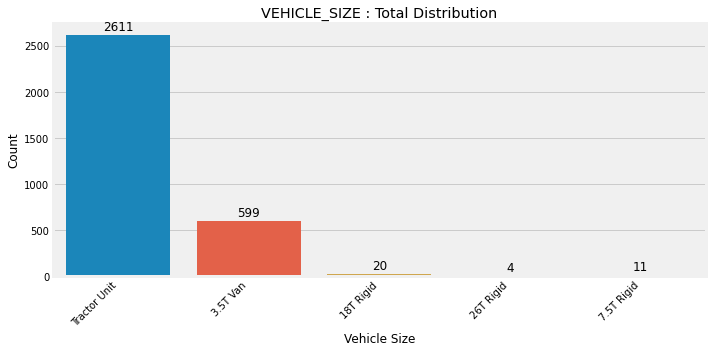

None


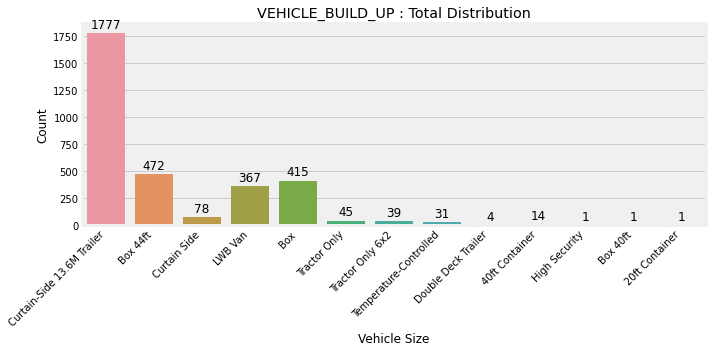

None


In [17]:
def countplot(column_name, data_type, dataframe):
    plt.figure(figsize=(10,5))

    ax = sns.countplot(x = dataframe[column_name]);

    # Annotate the bars with counts
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

    # Rotate x labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Vehicle Size')
    plt.ylabel('Count')
    plt.title(f'{column_name} : {data_type}')
    plt.tight_layout()
    return plt.show()

print(countplot("VEHICLE_SIZE","Total Distribution",df_shp_book))
print(countplot("VEHICLE_BUILD_UP","Total Distribution",df_shp_book))

# Task-1: 

### Operational teams rely heavily on KPIs like on-time collection and on-time delivery to gauge carrier performance. What percentage of shipments met the on-time delivery threshold (arriving no later than 30 minutes past the scheduled delivery window) between October 1st and December 31st, 2023? Please outline your assumptions.

**Assumptions**

1. The shipment time stamps in shipment bookings data set are the scheduled collection window (fist collection time and the latest collection time), after collecting the shipment, there is **scheduled delivery window** (the earliest delivery scheduled and latest delivery scheduled) for the shipment.

2. I assume the GPS data set has **record_timestamp that has the actual delivery time of the shipment** along with all other trackings. The **On-Time Delivery Threshold  = Scheduled Delivery Window + 30 minutes.**

3. In the record_timestamp from GPS data set, one shipment number has a multiple dates. As it is a tracking system, therefore, need to pick the one with latest date. **I assume, the maximum (latest) date-time in the GPS is when the delivery is completed for a particular shipment. So, I am considering, that latest date-time as the actual shipment delivery time.**

4. I will join these two data sets GPS and Shipment_bookings with the joining column shipment_number, so that I will get all the required data with me, such as scheduled delivery window and the actual delivery.

5. To select the shipments between October 1st and December 31st, 2023, I will select the **shipment delivery time from record_timestamp (Maximum date-time) of GPS data to filter, because that is when the shipment was delivered**. As per the task, it is asking to select percentage of on-time delivery between 1st October to 31st December. So, I assume, its asking between 1st October to 31st December what ever shipment is delivered, how many are on-time delivery. And from this shipment delivered period, I will find out if any shipment has met on-time delivery (schedule delivery window + 30 minute threshold) 

6. If any shipment's **actual delivery time stamp <= (scheduled delivery window + 30 minute threshold)** is the one which has met the on-time delivery threshold.


**Techniques to be used**

1. First convert all the timestamps from both the data set to timestamp / datetime datatype.

2. Join both the data set based on shipment number. 

3. Create a new column by making LAST_DELIVERY_SCHEDULE_LATEST + 30 minutes.

4. Group by the GPS data based on shipments and pick the max date from GPS data (Max is the latest when the delivery has happened)

4. Filter data set having shipments delivered from October 1st to December 31st, 2023 as described in the assumption section.

5. Check whether the GPS latest (max) delivery date-time is <= (LAST_DELIVERY_SCHEDULE_LATEST + 30 minutes)

6. Divide number of shipments derived from above (on-time delivery) with total shipments in the defined time-period * 100 to get the correct percentage of shipments delivered within scheduled delivery window

In [18]:
def ontime_delivery(shipment_data, gps_data):
    
    #Join two dataframes based on shipment_number
    df_filter = pd.merge(shipment_data, gps_data, on = "SHIPMENT_NUMBER")
    
    # excluding some columns
    df_filter = df_filter[[col for col in df_filter.columns if col not in(['FIRST_COLLECTION_POST_CODE',
                                                                           'LAST_DELIVERY_POST_CODE','LAT','LON'])]]
    
    #Create a new feature with scheduled delivery time window + 30 minutes, this is our delivery thershold
    df_filter["30_min_delay_time"] = df_filter["LAST_DELIVERY_SCHEDULE_LATEST"] + pd.Timedelta(minutes=30)
    
    # Group by on GPS shipment number, and take only the maximum date from record timestamp (Max date is the exact delivery time)
    new_df=pd.DataFrame(df_filter.groupby(["SHIPMENT_NUMBER","SHIPPER_ID","CARRIER_DISPLAY_ID","VEHICLE_SIZE",
                                           "VEHICLE_BUILD_UP","FIRST_COLLECTION_LATITUDE","FIRST_COLLECTION_LONGITUDE",
                                           "LAST_DELIVERY_LATITUDE","LAST_DELIVERY_LONGITUDE","LAST_DELIVERY_SCHEDULE_EARLIEST",
                                           'FIRST_COLLECTION_SCHEDULE_LATEST',"FIRST_COLLECTION_SCHEDULE_EARLIEST",
                                           "LAST_DELIVERY_SCHEDULE_LATEST","30_min_delay_time"])
                    ["RECORD_TIMESTAMP"].max()).reset_index()
    
    # Now filter the data based on the date 1st October to December 31st (Shipment Delivered dates)
    new_df = new_df[(new_df["RECORD_TIMESTAMP"] <='2023-12-31') & 
                (new_df["RECORD_TIMESTAMP"] >='2023-10-01')]
    
    # Now check which dates in RECORD_TIMESTAMP <= 30_min_delay_time (Delivery Threshold window)
    
    on_time_delivery_df = new_df[new_df["RECORD_TIMESTAMP"] <= new_df["30_min_delay_time"]] #Required data for this task
    
    delayed_delivery_df = new_df[new_df["RECORD_TIMESTAMP"] > new_df["30_min_delay_time"]] #Personal use
    
    ontime_delivery = on_time_delivery_df.shape[0] #Total no of on-time delivery shipments

    # Find the total number of shipments
    Total_delivery = new_df.shape[0]
    
    #Now calculate the percentage of on-time  shipment deliveries
    percentage = (ontime_delivery / Total_delivery) * 100
    
    return on_time_delivery_df, delayed_delivery_df, percentage

#Function call
on_time_delivery_df, delayed_delivery_df, delivery_percentage = ontime_delivery(df_shp_book, df_gps)
print("Percentage of ontime delivery is:",delivery_percentage)

Percentage of ontime delivery is: 62.6502311248074


### Task-1 is completed*****

### Analysis on delayed delivery and on-time delivery

In [19]:
#Total count
print("On-time delivery count:",on_time_delivery_df.shape[0])
print("Delayed delivery count:",delayed_delivery_df.shape[0])
print("Unique Shipper count in on-time delivery",on_time_delivery_df["SHIPPER_ID"].nunique())
print("Unique Shipper count in delayed delivery",delayed_delivery_df["SHIPPER_ID"].nunique())

On-time delivery count: 2033
Delayed delivery count: 1212
Unique Shipper count in on-time delivery 44
Unique Shipper count in delayed delivery 42


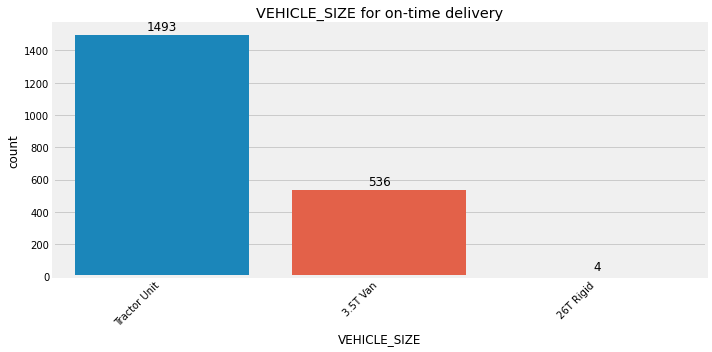

None


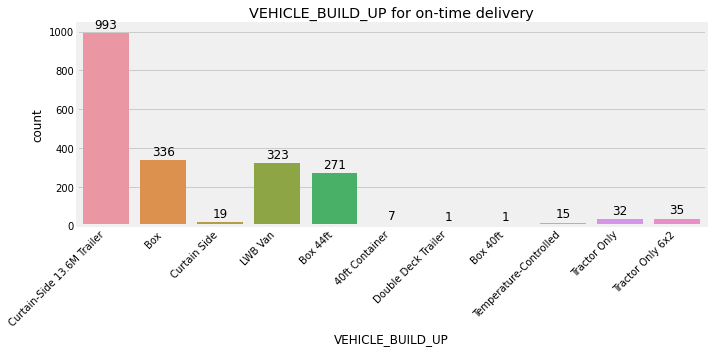

None


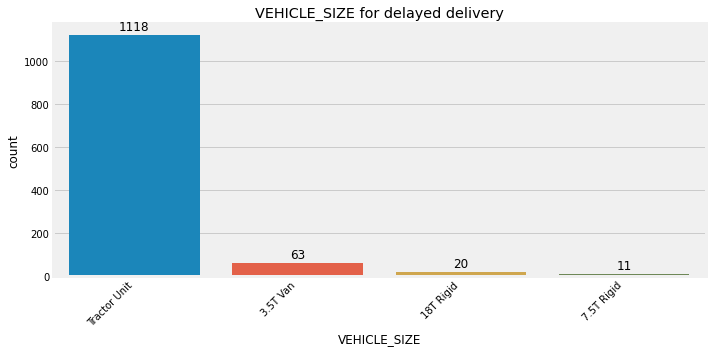

None


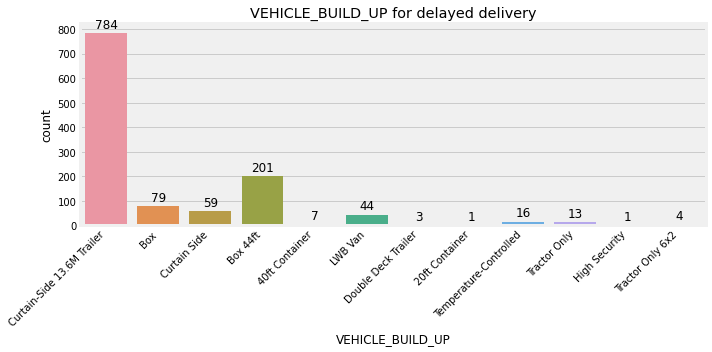

None


In [20]:
def countplot(column_name, data_type, dataframe):
    plt.figure(figsize=(10,5))

    ax = sns.countplot(x = dataframe[column_name]);

    # Annotate the bars with counts
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

    # Rotate x labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.title(f'{column_name} for {data_type}')
    plt.tight_layout()
    return plt.show()

print(countplot("VEHICLE_SIZE","on-time delivery",on_time_delivery_df))
print(countplot("VEHICLE_BUILD_UP","on-time delivery",on_time_delivery_df))
print(countplot("VEHICLE_SIZE","delayed delivery",delayed_delivery_df))
print(countplot("VEHICLE_BUILD_UP","delayed delivery",delayed_delivery_df))

### API Calls to extract the location names from the given Latitude and Longitude

**Extract Entire Location**

In [21]:
# Initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")

# Define a function to reverse geocode
def reverse_geocode(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), exactly_one=True)
        return location.address
    except:
        return None

# Use RateLimiter to throttle the API calls
reverse_geocode = RateLimiter(reverse_geocode, min_delay_seconds=1)

# Apply the function to each row
delayed_delivery_df['delivery_location'] = delayed_delivery_df.apply(lambda row: reverse_geocode(row['LAST_DELIVERY_LATITUDE'], row['LAST_DELIVERY_LONGITUDE']), axis=1)
print('delayed delivery location extraction completed')

on_time_delivery_df['delivery_location'] = on_time_delivery_df.apply(lambda row: reverse_geocode(row['LAST_DELIVERY_LATITUDE'], row['LAST_DELIVERY_LONGITUDE']), axis=1)
print('on_time_delivery_df location extraction completed')

delayed delivery location extraction completed
on_time_delivery_df location extraction completed


In [22]:
#Delayed delivery top location
delayed_delivery_df["delivery_location"].value_counts().head(10)

A57, Worksop, Bassetlaw, Nottinghamshire, England, S80 3EG, United Kingdom                                                              175
Enterprise Way, Thatcham, West Berkshire, England, RG19 4AE, United Kingdom                                                              67
Three Cherry Trees Lane, Maylands Business Park, Maylands, Hemel Hempstead, Dacorum, Hertfordshire, England, HP2 7DP, United Kingdom     44
Short Way, Thornbury, South Gloucestershire, West of England, England, BS35 3UT, United Kingdom                                          36
Aghnatrisk Road, County Down, Northern Ireland / Tuaisceart Éireann, BT26 6RJ, United Kingdom                                            26
Brancroft Way, Brimsdown, London Borough of Enfield, London, Greater London, England, United Kingdom                                     25
Quakers Coppice, Crewe Industrial Estate, Crewe, Cheshire East, England, CW1 6FA, United Kingdom                                         22
Dunelm, DC1, Sideway

In [23]:
#on-time delivery top location
on_time_delivery_df["delivery_location"].value_counts().head(10)

Roman Avenue, Optimus Point, Glenfields, Glenfield, Blaby, Leicestershire, England, LE3 8JS, United Kingdom                             129
Enterprise Way, Thatcham, West Berkshire, England, RG19 4AE, United Kingdom                                                              99
Howley Park Road East, Howley Park Industrial Estate, Morley, Woodkirk, Leeds, West Yorkshire, England, LS27 0GR, United Kingdom         76
A57, Worksop, Bassetlaw, Nottinghamshire, England, S80 3EG, United Kingdom                                                               74
East Midlands Airport, Airport Trail, Kegworth, North West Leicestershire, Leicestershire, England, DE74 2HN, United Kingdom             59
Three Cherry Trees Lane, Maylands Business Park, Maylands, Hemel Hempstead, Dacorum, Hertfordshire, England, HP2 7DP, United Kingdom     46
Brancroft Way, Brimsdown, London Borough of Enfield, London, Greater London, England, United Kingdom                                     45
Augustine Close, Col

**The highest on-time delivery has happened to this location: "Roman Avenue, Optimus Point, Glenfields, Glenfield, Blaby, Leicestershire, England, LE3 8JS, United Kingdom"**

**The highest delay in delivery has happened to this location: "A57, Worksop, Bassetlaw, Nottinghamshire, England, S80 3EG, United Kingdom"**

**Extract only the city**

In [24]:
# Initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")

# Define a function to reverse geocode and extract city name
def reverse_geocode_city(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), exactly_one=True)
        address = location.raw['address']
        city = address.get('city', '') or address.get('town', '') or address.get('village', '') or address.get('hamlet', '')
        return city
    except Exception as e:
        return None

# Use RateLimiter to throttle the API calls
reverse_geocode = RateLimiter(reverse_geocode, min_delay_seconds=1)

# Apply the function to each row
delayed_delivery_df['delivery_city'] = delayed_delivery_df.apply(lambda row: reverse_geocode_city(row['LAST_DELIVERY_LATITUDE'], row['LAST_DELIVERY_LONGITUDE']), axis=1)
print('delayed delivery location extraction completed')

on_time_delivery_df['delivery_city'] = on_time_delivery_df.apply(lambda row: reverse_geocode_city(row['LAST_DELIVERY_LATITUDE'], row['LAST_DELIVERY_LONGITUDE']), axis=1)
print('on_time_delivery_df location extraction completed')

delayed delivery location extraction completed
on_time_delivery_df location extraction completed


In [25]:
# save the files, because location name extraction takes a lot of time 
delayed_delivery_df.to_csv("delayed_delivery_df.csv",index = False)
on_time_delivery_df.to_csv("on_time_delivery_df.csv",index=False)

In [26]:
print("Count of City not identified from API for delayed delivery dataframe:",delayed_delivery_df[delayed_delivery_df["delivery_city"] == ""].shape[0])
print("Count of City not identified from API for on-time delivery dataframe:",on_time_delivery_df[on_time_delivery_df["delivery_city"] == ""].shape[0])

Count of City not identified from API for delayed delivery dataframe: 88
Count of City not identified from API for on-time delivery dataframe: 126


In [27]:
#Replace the raws having Null City to un-identified
delayed_delivery_df["delivery_city"] = delayed_delivery_df["delivery_city"].replace({"":"un-identified"})
on_time_delivery_df["delivery_city"] = on_time_delivery_df["delivery_city"].replace({"":"un-identified"})

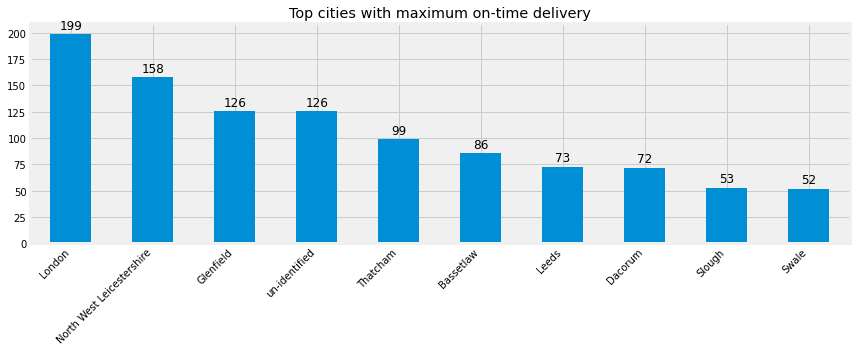

None


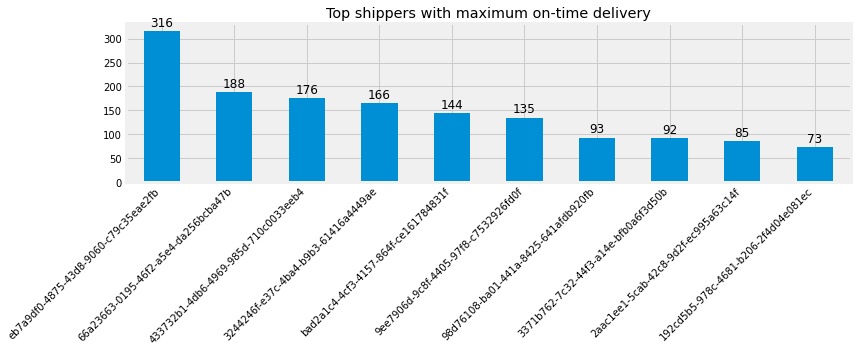

None


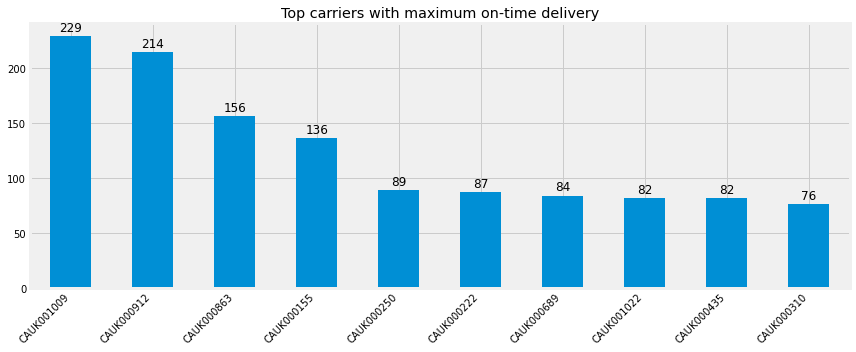

None


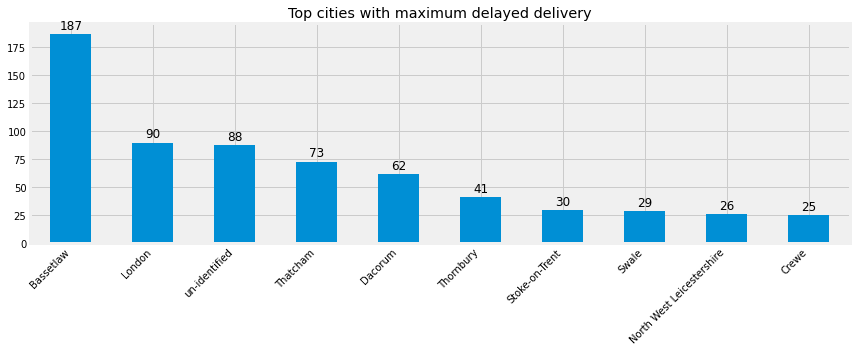

None


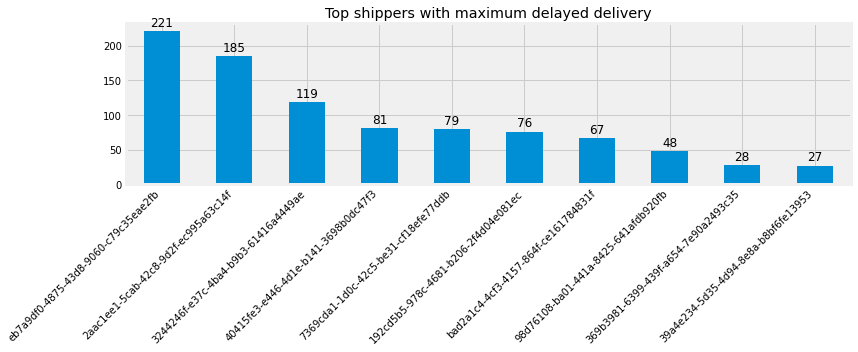

None


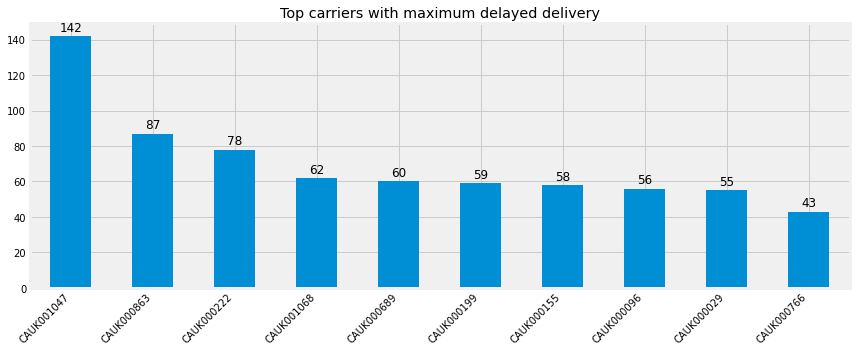

None


In [28]:
def plottings(column, data, col_name, comment):
    plt.figure(figsize=(12,5))
    ax = data[column].value_counts().head(10).plot(kind='bar')
    # Annotate the bars with counts
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
        ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
        textcoords='offset points')

    # Rotate x labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Top {col_name} with maximum {comment}')
    plt.tight_layout()
    return plt.show()


print(plottings("delivery_city", on_time_delivery_df, "cities", "on-time delivery"))
print(plottings("SHIPPER_ID", on_time_delivery_df, "shippers", "on-time delivery"))
print(plottings("CARRIER_DISPLAY_ID", on_time_delivery_df, "carriers", "on-time delivery"))
print(plottings("delivery_city", delayed_delivery_df, "cities", "delayed delivery"))
print(plottings("SHIPPER_ID", delayed_delivery_df, "shippers", "delayed delivery"))
print(plottings("CARRIER_DISPLAY_ID", delayed_delivery_df, "carriers", "delayed delivery"))


### Extracting Months, day and dayofweek to understand if any particular patterns exists

In [29]:
on_time_delivery_df['delivery_month'] = on_time_delivery_df['RECORD_TIMESTAMP'].dt.month
on_time_delivery_df['delivery_day'] = on_time_delivery_df['RECORD_TIMESTAMP'].dt.day
on_time_delivery_df['delivery_dayofweek'] = on_time_delivery_df['RECORD_TIMESTAMP'].dt.dayofweek

delayed_delivery_df['delivery_month'] = delayed_delivery_df['RECORD_TIMESTAMP'].dt.month
delayed_delivery_df['delivery_day'] = delayed_delivery_df['RECORD_TIMESTAMP'].dt.day
delayed_delivery_df['delivery_dayofweek'] = delayed_delivery_df['RECORD_TIMESTAMP'].dt.dayofweek

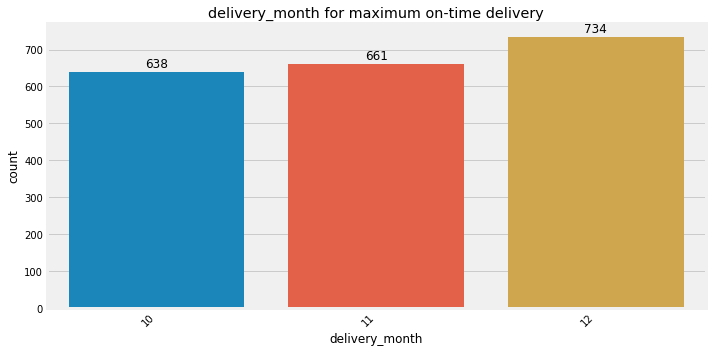

None


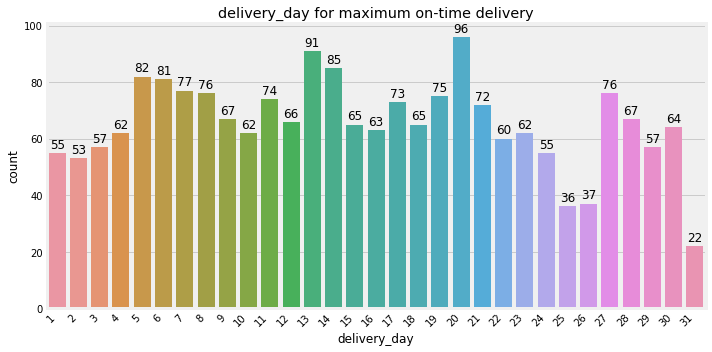

None


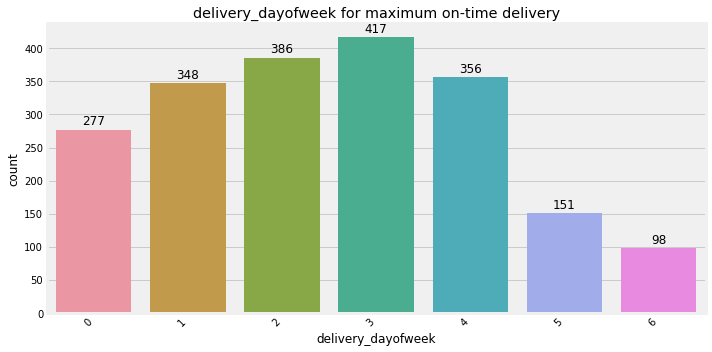

None


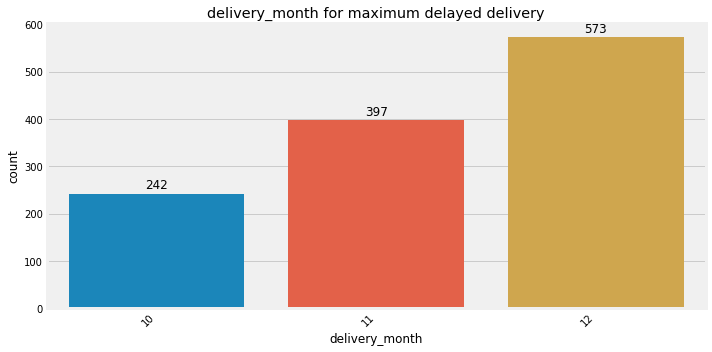

None


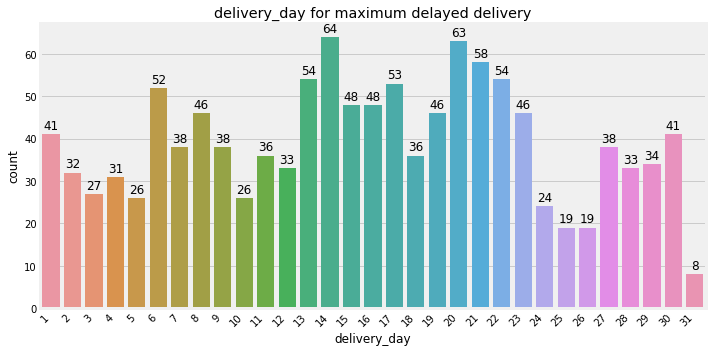

None


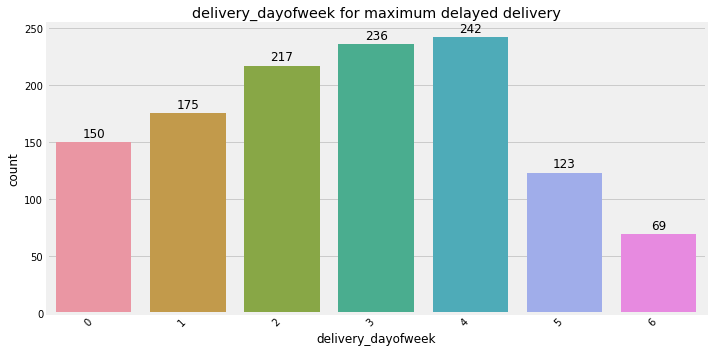

None


In [30]:
print(countplot('delivery_month',"maximum on-time delivery",on_time_delivery_df))
print(countplot('delivery_day',"maximum on-time delivery",on_time_delivery_df))
print(countplot('delivery_dayofweek',"maximum on-time delivery",on_time_delivery_df))

print(countplot('delivery_month',"maximum delayed delivery",delayed_delivery_df))
print(countplot('delivery_day',"maximum delayed delivery",delayed_delivery_df))
print(countplot('delivery_dayofweek',"maximum delayed delivery",delayed_delivery_df))

# Task-2:

### Timely communication of potential delays is crucial for shippers. During the 3-month period from 1 st Oct to 31st Dec 2023, which shipper(s) should be notified automatically regarding potential late delivery of which shipments, and at what times?

**Assumptions**

1. The maximum (latest) date-time for a shipment in the GPS data, is probably the date-time when the delivery has been completed (The actual delivery time), with I assume, the history date-time in the GPS before this shipment delivery date-time being the date-times of the shipment tracking throughout before delivering.

2. The notification system must keep checking each live tracking date-time of shipment from GPS to calculate the potential delay and notify accordingly at that respective time. Therefore, to make a data set of only tracking date-time (not when the shipment was delivered), I removed the actual delivery date-time (the maximum one). So, I extracted all the GPS tracking date-time of the shipment. Because at this period, I am considering, that my shipment has not been delivered and I have the live date-time from GPS to notify of a potential delay in delivery.

3. Now, I have all the tracking times from GPS before delivering, and I have the latest scheduled delivery date from shipment booking. Here, my goal is to find out potential delays and notify them before getting delayed. So,  I want to notify,  as soon as the GPS tracking date-time is >= (latest scheduled delivery time + 20) and < (latest scheduled delivery time + 30). That means I will notify you if the current GPS tracking time has crossed the latest scheduled delivery time at least 20 minutes before and is about to reach the threshold delivery window by notifying you 10 minutes before the delivery threshold (delivery threshold = latest scheduled delivery time + 30). 

4. Shipper information I will get from SHIPPER_ID.

5. I also assume, if the shipment collection is delayed (> collection delivery window) then also there is a chance of potential delay of delivering. But at this stage, I am only considering latest delivery schedule date-time to calculate potential delays.

6. I have also given an example at the end of this code for better understanding of what I am doing.

Note: The 10-minute time frame before reaching the delivery threshold for notification can also be changed depending on the business interest!

In [31]:
def delayed_delivery_notification(shipment_data, gps_data):
    
    #Join two dataframes based on shipment_number
    df_filter = pd.merge(shipment_data, gps_data, on = "SHIPMENT_NUMBER")
    
    # Keeping only the Required columns
    df_filter = df_filter[["SHIPMENT_NUMBER","SHIPPER_ID","LAST_DELIVERY_SCHEDULE_LATEST","RECORD_TIMESTAMP"]]
    
    #Scheduled delivery time window + 20 minutes, will notify if latest tracking datetime has reached below time
    df_filter["20_min_delay_time"] = df_filter["LAST_DELIVERY_SCHEDULE_LATEST"] + pd.Timedelta(minutes=20)
    
    #Threshold of on-time delivery window
    df_filter["30_min_delay_time"] = df_filter["LAST_DELIVERY_SCHEDULE_LATEST"] + pd.Timedelta(minutes=30)
    
    #rank is to select the rank of each date from max to min based on dates
    df_filter["Rank"] = (df_filter.groupby(["SHIPMENT_NUMBER"])["RECORD_TIMESTAMP"].rank(method='first', ascending=False))
    
    #Remove the actual delivery time, as we want the tracking dates before delivering for notification
    new_df = df_filter[df_filter["Rank"] != 1].drop("Rank",axis=1).reset_index().drop("index",axis=1)
    
    # Now filter the data set based on the date 1st October to December 31st
    new_df = new_df[(new_df["LAST_DELIVERY_SCHEDULE_LATEST"] <='2023-12-31') & 
                (new_df["LAST_DELIVERY_SCHEDULE_LATEST"] >='2023-10-01')]
    
    # Check if GPS time is >= 20_min_delay_time (10 minutes before scheduled delivery threshold) and < Scheduled Delivery Threshold
    new_df = new_df[(new_df["RECORD_TIMESTAMP"] >= new_df["20_min_delay_time"]) &
                   (new_df["RECORD_TIMESTAMP"] < new_df["30_min_delay_time"])]
    
    new_df = new_df.rename(columns={"RECORD_TIMESTAMP":"NOTIFICATION_TIME"}) #rename the column as notification time
    
    #select only required columns: shipper name, shipment number and notification time
    new_df = new_df[["SHIPPER_ID","SHIPMENT_NUMBER","NOTIFICATION_TIME"]].reset_index().drop("index",axis=1)
    
    #Multiple dates in the calculated notification timeframe, select the very first one as notification time 
    new_df = pd.DataFrame(new_df.groupby(["SHIPPER_ID","SHIPMENT_NUMBER"])["NOTIFICATION_TIME"].min()).reset_index()
    
    return new_df

#Function call
delayed_notification_df = delayed_delivery_notification(df_shp_book, df_gps)
#delayed_notification_df[delayed_notification_df["SHIPMENT_NUMBER"] == "SEZHUK-231211-272127"]
delayed_notification_df

,SHIPPER_ID,SHIPMENT_NUMBER,NOTIFICATION_TIME
0,192cd5b5-978c-4681-b206-2f4d04e081ec,SEZHUK-231013-252718,2023-10-17 08:00:00+00:00
1,192cd5b5-978c-4681-b206-2f4d04e081ec,SEZHUK-231017-253698,2023-10-19 09:02:00+00:00
2,192cd5b5-978c-4681-b206-2f4d04e081ec,SEZHUK-231018-254065,2023-10-20 11:00:00+00:00
3,192cd5b5-978c-4681-b206-2f4d04e081ec,SEZHUK-231024-256044,2023-10-26 10:24:00+00:00
4,192cd5b5-978c-4681-b206-2f4d04e081ec,SEZHUK-231031-258065,2023-11-03 08:25:00+00:00
...,...,...,...
442,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275059,2023-12-23 09:17:00+00:00
443,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231223-276621,2023-12-24 14:42:00+00:00
444,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231223-276638,2023-12-27 14:42:00+00:00
445,ee7cbc7b-4f14-44ac-9c6e-086d70a27141,SEZHUK-231206-270409,2023-12-08 18:20:00+00:00


In [32]:
delayed_notification_df.shape

(447, 3)

In [33]:
delayed_notification_df["SHIPMENT_NUMBER"].nunique()

447

In [34]:
delayed_notification_df["SHIPPER_ID"].nunique()

33

### Task-2 is completed**

### Example to show what exactly I am doing for task-2

**Taking example as below one from the output of Task-2**

In [35]:
#Notification time
delayed_notification_df[delayed_notification_df["SHIPMENT_NUMBER"] == "SEZHUK-231211-272127"]

,SHIPPER_ID,SHIPMENT_NUMBER,NOTIFICATION_TIME
233,40415fe3-e446-4d1e-b141-3698b0dc47f3,SEZHUK-231211-272127,2023-12-13 16:20:00+00:00


In [36]:
#Latest scheduled delivery date-time
df_shp_book[df_shp_book["SHIPMENT_NUMBER"] == "SEZHUK-231211-272127"][["SHIPMENT_NUMBER","LAST_DELIVERY_SCHEDULE_LATEST"]]

,SHIPMENT_NUMBER,LAST_DELIVERY_SCHEDULE_LATEST
3,SEZHUK-231211-272127,2023-12-13 16:00:00+00:00


In [37]:
#Delivery Threshold window which is +30 minute for above shipment
pd.to_datetime("2023-12-13 16:00:00+00:00") + pd.Timedelta(minutes=30)

Timestamp('2023-12-13 16:30:00+0000', tz='UTC')

In [38]:
#Check tracking history dates for the above shipment
df_gps[df_gps["SHIPMENT_NUMBER"] == "SEZHUK-231211-272127"].sort_values(by = "RECORD_TIMESTAMP", ascending=False).head(10)

,SHIPMENT_NUMBER,LAT,LON,RECORD_TIMESTAMP
506516,SEZHUK-231211-272127,52.889862,-0.634389,2023-12-13 17:22:00+00:00
506515,SEZHUK-231211-272127,52.890594,-0.634765,2023-12-13 16:46:00+00:00
506514,SEZHUK-231211-272127,52.890664,-0.633919,2023-12-13 16:42:00+00:00
506513,SEZHUK-231211-272127,52.891457,-0.635607,2023-12-13 16:34:00+00:00
506512,SEZHUK-231211-272127,52.889929,-0.636091,2023-12-13 16:33:00+00:00
506511,SEZHUK-231211-272127,52.889578,-0.634969,2023-12-13 16:32:00+00:00
506510,SEZHUK-231211-272127,52.889616,-0.634197,2023-12-13 16:23:00+00:00
506509,SEZHUK-231211-272127,52.891487,-0.633124,2023-12-13 16:21:00+00:00
506508,SEZHUK-231211-272127,52.883984,-0.632910,2023-12-13 16:20:00+00:00
506507,SEZHUK-231211-272127,52.879134,-0.632718,2023-12-13 16:19:00+00:00


**Understanding**

Check for shipment number "SEZHUK-231211-272127" in both shipment booking and gps data set.

You will see in shipment booking, **LAST_DELIVERY_SCHEDULE_LATEST = "2023-12-13 16:00:00+00:00"**

The on-time **delivery window threshold** is ("2023-12-13 16:00:00+00:00" + 30 minutes) = **'2023-12-13 16:30:00+0000'**

Now, you check on gps data for this particular shipment, you will see the latest date is: "2023-12-13 17:22:00+00:00"
But this maximum date is nothing but the actual delivery time, so I am selecting the tracking date-times before delivering (So excluding the actual delivery time).

As delivery threshold is +30 minute of LAST_DELIVERY_SCHEDULE_LATEST, so I am checking if my tracking date-time is >= +20 minute of  LAST_DELIVERY_SCHEDULE_LATEST and < +30. Basically I want to notify when the current live tracking date-time is about to reach delivery threshold, as soon as the latest shipment delivery tracking is within this 10 minute timeframe.

**So, my notification time will be when the GPS tracking date-time was : 2023-12-13 16:20:00+00:00** (Before reaching the delivery threshold window) as this date-time is the first date-time when it entered that 10 minute time frame.

# Task-3

### Predict the likelihood of delay for the list of shipments in “New_bookings.csv”

In [49]:
#These data sets are created from task-1. To avoid repeatation of code running (Location extraction from Lat and Long takes too much of time), the data files were saved

delayed_data = pd.read_csv("delayed_delivery_df.csv")
on_time_data = pd.read_csv("on_time_delivery_df.csv")

### Drop Unwanted Features

In [50]:
delayed_data.drop(["SHIPMENT_NUMBER","SHIPPER_ID","CARRIER_DISPLAY_ID","delivery_location","delivery_city","30_min_delay_time","RECORD_TIMESTAMP"],axis=1, inplace=True)
on_time_data.drop(["SHIPMENT_NUMBER","SHIPPER_ID","CARRIER_DISPLAY_ID","delivery_location","delivery_city","30_min_delay_time","RECORD_TIMESTAMP"],axis=1, inplace=True)


#from prediction data
df_nw_prediction = df_nw_book.copy()
df_nw_prediction.drop(["SHIPMENT_NUMBER","SHIPPER_ID","CARRIER_ID","FIRST_COLLECTION_POST_CODE","LAST_DELIVERY_POST_CODE"],axis=1, inplace=True)

### Feature Engineering



**Create target field for classification by adding a new field "Delayed_Delivery" with values as (Yes/No)**

As the data sets are extracted from Task-1, so these are 2 separates files with on-time delivery and delay in delivery

In [51]:
#Create Target Field
delayed_data["Delayed_Delivery"] = "Yes"
on_time_data["Delayed_Delivery"] = "No"

print(delayed_data["Delayed_Delivery"].value_counts())
print(on_time_data["Delayed_Delivery"].value_counts())

Yes    1212
Name: Delayed_Delivery, dtype: int64
No    2033
Name: Delayed_Delivery, dtype: int64


In [52]:
# Concat both data sets and make it one
final_df = pd.concat([delayed_data,on_time_data])
print(final_df.shape)
print(final_df["Delayed_Delivery"].value_counts())

(3245, 11)
No     2033
Yes    1212
Name: Delayed_Delivery, dtype: int64


**Convert data-types**

In [53]:
# Change data types
final_df['FIRST_COLLECTION_SCHEDULE_EARLIEST'] = pd.to_datetime(final_df['FIRST_COLLECTION_SCHEDULE_EARLIEST'], utc=True)
final_df['FIRST_COLLECTION_SCHEDULE_LATEST'] = pd.to_datetime(final_df['FIRST_COLLECTION_SCHEDULE_LATEST'], utc=True)
final_df['LAST_DELIVERY_SCHEDULE_EARLIEST'] = pd.to_datetime(final_df['LAST_DELIVERY_SCHEDULE_EARLIEST'], utc=True)
final_df['LAST_DELIVERY_SCHEDULE_LATEST'] = pd.to_datetime(final_df['LAST_DELIVERY_SCHEDULE_LATEST'], utc=True)

df_nw_prediction['FIRST_COLLECTION_SCHEDULE_EARLIEST'] = pd.to_datetime(df_nw_prediction['FIRST_COLLECTION_SCHEDULE_EARLIEST'], utc=True)
df_nw_prediction['FIRST_COLLECTION_SCHEDULE_LATEST'] = pd.to_datetime(df_nw_prediction['FIRST_COLLECTION_SCHEDULE_LATEST'], utc=True)
df_nw_prediction['LAST_DELIVERY_SCHEDULE_EARLIEST'] = pd.to_datetime(df_nw_prediction['LAST_DELIVERY_SCHEDULE_EARLIEST'], utc=True)
df_nw_prediction['LAST_DELIVERY_SCHEDULE_LATEST'] = pd.to_datetime(df_nw_prediction['LAST_DELIVERY_SCHEDULE_LATEST'], utc=True)

In [54]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3245 entries, 0 to 2032
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   VEHICLE_SIZE                        3245 non-null   object             
 1   VEHICLE_BUILD_UP                    3245 non-null   object             
 2   FIRST_COLLECTION_LATITUDE           3245 non-null   float64            
 3   FIRST_COLLECTION_LONGITUDE          3245 non-null   float64            
 4   LAST_DELIVERY_LATITUDE              3245 non-null   float64            
 5   LAST_DELIVERY_LONGITUDE             3245 non-null   float64            
 6   LAST_DELIVERY_SCHEDULE_EARLIEST     3245 non-null   datetime64[ns, UTC]
 7   FIRST_COLLECTION_SCHEDULE_LATEST    3245 non-null   datetime64[ns, UTC]
 8   FIRST_COLLECTION_SCHEDULE_EARLIEST  3245 non-null   datetime64[ns, UTC]
 9   LAST_DELIVERY_SCHEDULE_LATEST       3245 

**Create new features from date field (Month, Day, DayofWeek, Hour, Minute)**

In [55]:
def create_date_features(new_col_name, target_col, data):
    
    data[new_col_name+'_month'] = data[target_col].dt.month
    data[new_col_name+'_day'] = data[target_col].dt.day
    data[new_col_name+'_dayofweek'] = data[target_col].dt.dayofweek
    data[new_col_name+'_hour'] = data[target_col].dt.hour
    data[new_col_name+'_minute'] = data[target_col].dt.minute
    
    return data[new_col_name+'_month'],data[new_col_name+'_day'],data[new_col_name+'_dayofweek'],data[new_col_name+'_hour'],data[new_col_name+'_minute']

_,_,_,_,_=create_date_features("delivery_latest", 'LAST_DELIVERY_SCHEDULE_LATEST',final_df)  
_,_,_,_,_=create_date_features("delivery_earliest", 'LAST_DELIVERY_SCHEDULE_EARLIEST',final_df)  
_,_,_,_,_=create_date_features("collection_latest", 'FIRST_COLLECTION_SCHEDULE_LATEST',final_df) 
_,_,_,_,_=create_date_features("collection_earliest", 'FIRST_COLLECTION_SCHEDULE_EARLIEST',final_df)


_,_,_,_,_=create_date_features("delivery_latest", 'LAST_DELIVERY_SCHEDULE_LATEST',df_nw_prediction)  
_,_,_,_,_=create_date_features("delivery_earliest", 'LAST_DELIVERY_SCHEDULE_EARLIEST',df_nw_prediction)  
_,_,_,_,_=create_date_features("collection_latest", 'FIRST_COLLECTION_SCHEDULE_LATEST',df_nw_prediction) 
_,_,_,_,_=create_date_features("collection_earliest", 'FIRST_COLLECTION_SCHEDULE_EARLIEST',df_nw_prediction)

final_df.drop(['LAST_DELIVERY_SCHEDULE_LATEST','LAST_DELIVERY_SCHEDULE_EARLIEST',
               'FIRST_COLLECTION_SCHEDULE_LATEST','FIRST_COLLECTION_SCHEDULE_EARLIEST'], axis=1, inplace=True)

df_nw_prediction.drop(['LAST_DELIVERY_SCHEDULE_LATEST','LAST_DELIVERY_SCHEDULE_EARLIEST',
               'FIRST_COLLECTION_SCHEDULE_LATEST','FIRST_COLLECTION_SCHEDULE_EARLIEST'], axis=1, inplace=True)

### Data Encoding

In [56]:
final_df["Delayed_Delivery"] = final_df["Delayed_Delivery"].replace({"Yes":1,"No":0})

final_df["VEHICLE_SIZE"] = final_df["VEHICLE_SIZE"].replace({'Tractor Unit':6,'3.5T Van':3.5,
                                                             '18T Rigid':18,'26T Rigid':26,'7.5T Rigid':7.5})

final_df = pd.get_dummies(final_df,columns=["VEHICLE_BUILD_UP"])

# For prediction data
df_nw_prediction["VEHICLE_SIZE"] = df_nw_prediction["VEHICLE_SIZE"].replace({'Tractor Unit':6,'3.5T Van':3.5, '3.5 T Van':3.5,
                                                             '18T Rigid':18,'26T Rigid':26,'7.5T Rigid':7.5, '7.5 T':7.5})

df_nw_prediction = pd.get_dummies(df_nw_prediction,columns=["VEHICLE_BUILD_UP"])

Delayed_Delivery (Target): Simple Binary Encoding

VEHICLE_SIZE: The average weight of Tractor unit is 6 tonnes, so I will encode it as 6. For remaining vehicles, I will remove the string part and will keep only respective weights to encode.

VEHICLE_BUILD_UP: This also seems like an ordinal variable but some labels such as high security and temperature controlled, there is no order. Therefore, I will do one-hot encoding to whole feature.

There are label differences in shiment data and the new bookings for VEHICLE_BUILD_UP. Therefore, the columns which are not available for them I will create a new column with zero values to maintain the column consistency between training data and new data

In [57]:
final_df_cols = final_df.columns
cls = df_nw_prediction.columns

print("*****Columns to create in new prediction data*****")
for col in final_df_cols:
    if col not in  cls:
        print(col)
print("*****Columns to create in original training data*****")
for col in cls:
    if col not in  final_df_cols:
        print(col)
        
#Create columns
df_nw_prediction["VEHICLE_BUILD_UP_20ft Container"] = 0
df_nw_prediction["VEHICLE_BUILD_UP_40ft Container"] = 0
df_nw_prediction["VEHICLE_BUILD_UP_Box 40ft"] = 0
df_nw_prediction["VEHICLE_BUILD_UP_Double Deck Trailer"] = 0
df_nw_prediction["VEHICLE_BUILD_UP_Tractor Only"] = 0

final_df["VEHICLE_BUILD_UP_Luton Tail Lift"] = 0
final_df["VEHICLE_BUILD_UP_Mega / High Cube Trailer"] = 0



*****Columns to create in new prediction data*****
Delayed_Delivery
VEHICLE_BUILD_UP_20ft Container
VEHICLE_BUILD_UP_40ft Container
VEHICLE_BUILD_UP_Box 40ft
VEHICLE_BUILD_UP_Double Deck Trailer
VEHICLE_BUILD_UP_Tractor Only
*****Columns to create in original training data*****
VEHICLE_BUILD_UP_Luton Tail Lift
VEHICLE_BUILD_UP_Mega / High Cube Trailer


### Model Building

**Train Test Split (Before prediction on new data, I need a validation data set to evaluate my model)**

In [58]:
X = final_df.drop("Delayed_Delivery", axis=1)
y = final_df["Delayed_Delivery"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

**Model Building**

In [59]:
model_RF = BalancedRandomForestClassifier(random_state=1, n_estimators=300, max_depth= 5)

model_RF.fit(x_train, y_train)

predict_test = model_RF.predict(x_test)
predict_train = model_RF.predict(x_train)

print(classification_report(y_test, predict_test))
print(classification_report(y_train, predict_train))

              precision    recall  f1-score   support

           0       0.84      0.53      0.65       509
           1       0.51      0.83      0.63       303

    accuracy                           0.64       812
   macro avg       0.68      0.68      0.64       812
weighted avg       0.72      0.64      0.64       812

              precision    recall  f1-score   support

           0       0.90      0.56      0.69      1524
           1       0.55      0.89      0.68       909

    accuracy                           0.68      2433
   macro avg       0.72      0.73      0.68      2433
weighted avg       0.77      0.68      0.68      2433



**Important metric to consider is Recall value of True delay for the evaluation data, because if a actual likely-delay shipment will get predicted as on-time (False negative), we are on wrong trackings, so the goal is to predict more and more delay shipments corretly and reduce the false negatives, which is nothing but the "Recall" Value**

Here in this model is able to find 83% correct true delay shipments (We can improve in future with more models and tunings)

**Prediction on New Data**

Total number of new data: 1000
Total number of shipments that likely to be delayed: 376


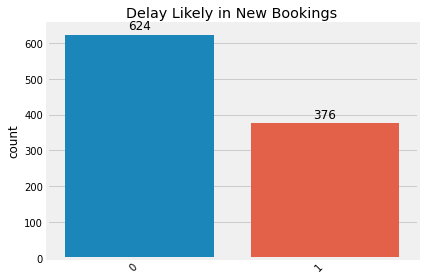

In [60]:
#Make the order of columns equal in both training and prediction data set
df_nw_prediction = df_nw_prediction[x_train.columns]

#Predict using the fitted trained mdoel
new_prediction = model_RF.predict(df_nw_prediction)

print("Total number of new data:", len(new_prediction))

#Count of delay
count = 0
for pred in new_prediction:
    if pred == 1:
        count +=1
        
print("Total number of shipments that likely to be delayed:", count)

ax = sns.countplot(pd.Series(new_prediction))
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
    textcoords='offset points')

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')
plt.title("Delay Likely in New Bookings")
plt.tight_layout()

**Note: Many more things can be included in data transformation, feature engineering, Model building, and evaluation. This code is representing a basic structure on model prediction**

# Outline the predictive model deployment process to an end-point

1. Data Processing Pipeline (collection, cleaning, feature engineering, encoding and many more depending on data)
2. Model Training
3. Model Evaluation
4. Model fine-tuning 
4. Model Serialization (Saving)
5. Create requirement file
5. Model integration on cloud using a container
6. Utilising version control for latest updates
7. API development (To make predictions using the model, and return the results to the user) 
8. Deploy the container to the cloud
8. Proper documentation